In [1]:
import numpy as np
import pandas as pd
import os
from os.path import join
import pickle
import sys
from keras.models import load_model
from keras.utils import to_categorical
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import seaborn as sn

Using TensorFlow backend.


In [2]:
thisPath = os.getcwd()
os.chdir("../../code")
projectDir = os.getcwd()
from evalUtils import plotModelHist, UrgentVRoutne, reportBinaryScores

In [3]:
from evalUtils import plotModelHist, UrgentVRoutne, reportBinaryScores

In [34]:
yTestPath = r"D:\Projects\OCT-Image-Classification\PreprocessedData\preprocessedForCNN\224 x 224\targetData_(224, 224, 3)_test.csv"
yTrueTest = pd.read_csv(yTestPath, index_col=0)

In [27]:
modelsPath = r"D:\Projects\OCT-Image-Classification\modelOutput\compareModels4"
InceptionPath = r"InceptionV3_dataAug_False2019-06-01_20_41_default"
ResNet50Path = r"ResNet50_dataAug_False2019-06-01_18_31_default" 
VGG16Path = r"VGG16_dataAug_False2019-06-05_15_46_default_224_noprep" 
XceptionPath = r"Xception_dataAug_False2019-06-02_10_52_default"

0 VGG16_dataAug_False2019-06-05_15_46_default_224_noprep


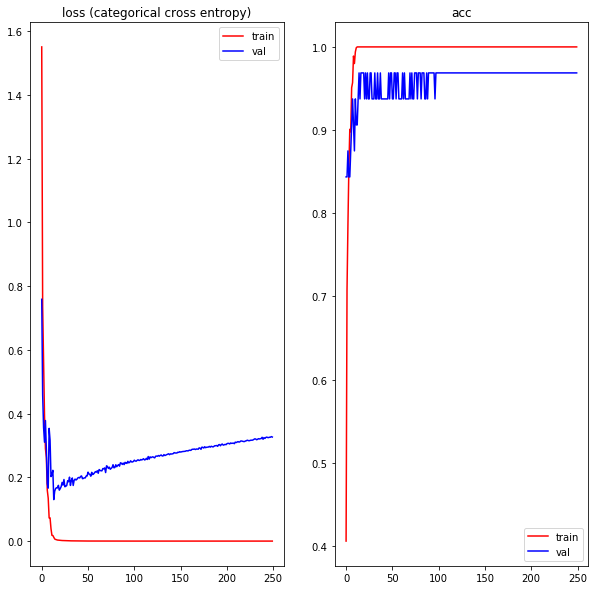

1 ResNet50_dataAug_False2019-06-01_18_31_default


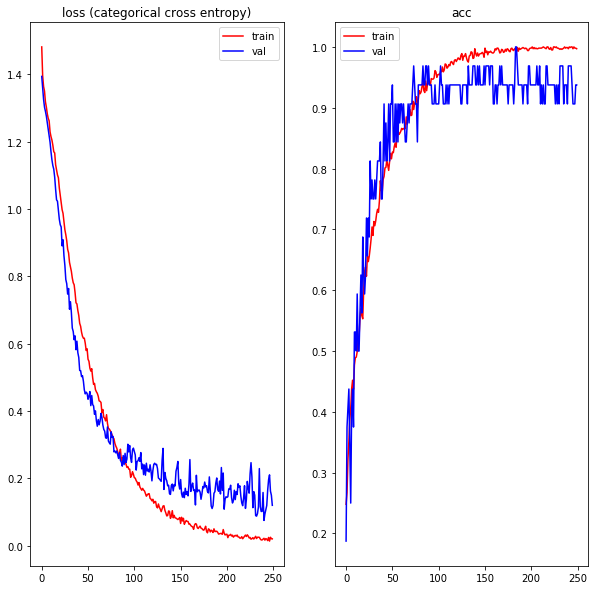

2 InceptionV3_dataAug_False2019-06-01_20_41_default


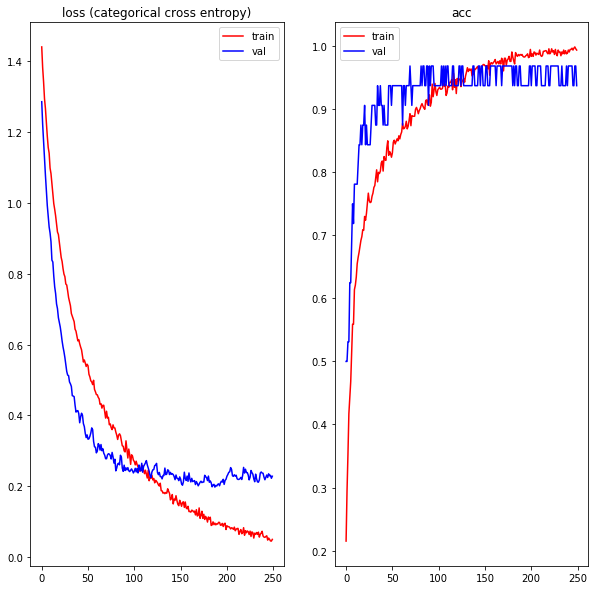

3 Xception_dataAug_False2019-06-02_10_52_default


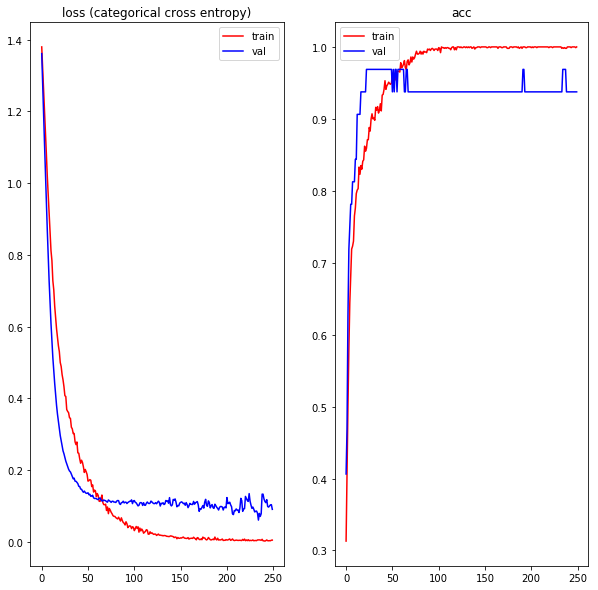

In [28]:
dirList = [VGG16Path, ResNet50Path, InceptionPath, XceptionPath] #
modelNames = ["VGG16", "ResNet50", "InceptionV3", "Xception"] #
yLblsUnique = np.unique(yTestTrue.values)
modelPred = {}
modelPredDF = pd.DataFrame(index=yTestTrue.index)
modelPredDF['yTestTrue'] = yTestTrue
for i, (expDir, modelName) in enumerate(zip(dirList, modelNames)):
    print(i, expDir)
    expPath = join(modelsPath, expDir)
    assert(os.path.isdir(expPath))
    histPath = join(expPath, "{}_History.csv".format(modelName)) 
    modelHist = pd.read_csv(histPath, index_col=0)
    plotModelHist(modelHist)
    
    yTestPredDF = pd.read_csv(join(expPath, "yPredDf__testSet_.csv"), index_col=0)
    modelPredDF.join(yTestPredDF)
    '''
    if modelName == "VGG16":
        print('loading yTestPred')
        yTestPred = np.load(join(expPath, "yTestPred.npy"))
    else:
        print('loading yPred__testSet_')
    '''
    yTestPred = np.load(join(expPath, "yPred__testSet_.npy"))
    for yLbl in yLblsUnique:
        modelPredDF[modelName  +"_{}".format(yLbl)] = yTestPred[:, yLbl]
    modelPred[modelName] = yTestPred

    
#modelPredDF['yTrueLbls'] = yTrueTest299


In [40]:
modelPredDF.to_csv(join(thisPath, 'modelPredictions.csv'))

In [29]:
modelPredDF

,yTestTrue,VGG16_0,VGG16_1,VGG16_2,VGG16_3,ResNet50_0,ResNet50_1,ResNet50_2,ResNet50_3,InceptionV3_0,InceptionV3_1,InceptionV3_2,InceptionV3_3,Xception_0,Xception_1,Xception_2,Xception_3
CNV-1016042-1,2,2.466894e-08,8.876298e-04,9.990833e-01,2.906433e-05,1.644253e-05,2.019220e-03,9.858890e-01,0.012075,0.000015,0.005318,0.959304,0.035364,1.065509e-05,5.265871e-02,9.466675e-01,6.630903e-04
CNV-1016042-2,2,1.511016e-07,1.385994e-03,9.981415e-01,4.723615e-04,4.805150e-01,5.258110e-02,1.845154e-01,0.282388,0.016040,0.000132,0.669523,0.314305,5.453227e-04,5.215053e-05,8.445765e-01,1.548261e-01
CNV-1016042-3,2,1.338548e-08,8.571199e-04,9.990048e-01,1.381833e-04,3.476984e-09,1.737819e-08,9.999807e-01,0.000019,0.000355,0.000689,0.833217,0.165739,3.550336e-06,2.515224e-05,9.948826e-01,5.088758e-03
CNV-1016042-4,2,7.863859e-08,2.477458e-03,9.967806e-01,7.418352e-04,5.406207e-08,4.037310e-04,9.995770e-01,0.000019,0.000039,0.014070,0.828298,0.157593,1.669292e-04,1.538306e-03,9.970432e-01,1.251581e-03
CNV-103044-1,2,2.189001e-06,2.394113e-03,9.933155e-01,4.288224e-03,5.013298e-07,1.092433e-04,9.993782e-01,0.000512,0.000156,0.002006,0.987958,0.009880,9.487508e-06,5.548787e-07,9.999275e-01,6.245897e-05
CNV-103044-10,2,3.256297e-01,4.597952e-01,1.873244e-01,2.725069e-02,3.225020e-04,4.416563e-01,5.407223e-01,0.017299,0.000248,0.723895,0.266024,0.009833,3.447950e-04,6.411819e-02,9.352932e-01,2.437982e-04
CNV-103044-11,2,1.192492e-06,4.062457e-02,9.583444e-01,1.029831e-03,7.268137e-08,5.989867e-03,9.812428e-01,0.012767,0.000003,0.001771,0.997257,0.000969,7.609282e-05,2.911579e-05,9.995529e-01,3.418201e-04
CNV-103044-12,2,1.338786e-09,3.300605e-04,9.996690e-01,9.180102e-07,5.096808e-07,3.058469e-03,9.969175e-01,0.000023,0.000021,0.001036,0.998824,0.000119,2.794013e-06,2.634948e-06,9.999839e-01,1.058839e-05
CNV-103044-2,2,6.551600e-07,1.166251e-02,9.847518e-01,3.585060e-03,3.982035e-08,8.770251e-05,9.998543e-01,0.000058,0.000003,0.001617,0.997984,0.000396,8.394397e-07,2.722032e-06,9.999913e-01,5.182844e-06
CNV-103044-3,2,5.594218e-07,8.885801e-01,1.114155e-01,3.894379e-06,2.412801e-06,6.739579e-01,3.254358e-01,0.000604,0.000059,0.028275,0.968472,0.003193,3.087426e-05,1.032861e-03,9.985019e-01,4.343329e-04


In [30]:
classMap = {
    "NORMAL": 0,
    "DRUSEN": 1,
    "CNV": 2,
    "DME": 3}

In [35]:
AccListVGG16 = []
SensListVGG16 = []
SpecListVGG16 = []

aucListVGG16 = []
fprsListVGG16 = []
tprsListVGG16 = []

metricDict = {}
for model_i in modelPred.keys():
    print(model_i)
    '''
    if model_i == "VGG16":
        print('vgg yPred')
        yTrueTest = yTrueTest224
    else:
        yTrueTest = yTrueTest299
    '''
    yTrue1Hot = to_categorical(yTrueTest)
    yTrueTestUrgent = UrgentVRoutne(yTrue1Hot, classMap).astype(np.int)
    
    yTestPred = modelPred[model_i]
    classAcc = accuracy_score(yTrueTest,
                              yTestPred.argmax(axis=1))
    print('\t accuracy: {0:.3g}'.format(classAcc))
    yTestPredUrgent = UrgentVRoutne(yTestPred, classMap)
    print()
    print('\t binary (urgent vs non-urgent)')
    scores = reportBinaryScores(yTrueTestUrgent, yTestPredUrgent, v=1)
    acc, tpr, tnr, plr, nlr = scores
    
    fprs, tprs, _ = roc_curve(yTrueTestUrgent, yTestPredUrgent)
    aucUrgent = auc(fprs, tprs)
    print('\t auc {0:.3g}'.format(aucUrgent))
    metricDict[model_i] = {}
    metricDict[model_i]["acc"] = acc
    metricDict[model_i]["tpr"] = tpr
    metricDict[model_i]["tnr"] = tnr
    metricDict[model_i]["aucUrgent"] = aucUrgent
    metricDict[model_i]["fprs"] = fprs
    metricDict[model_i]["tprs"] = tprs
    
    #print(classAcc, acc)
    AccListVGG16.append(acc)
    SensListVGG16.append(tpr)
    SpecListVGG16.append(tnr)
    
    aucListVGG16.append(aucUrgent)
    fprsListVGG16.append(fprs)
    tprsListVGG16.append(tprs)
    #if model_i == "ResNet50":
    #    break

VGG16
	 accuracy: 0.893

	 binary (urgent vs non-urgent)
	 accuracy: 0.924
	 sensitivity 0.955
	 specificity 0.893
	 positive likelihood ratio 8.88
	 negative likelihood ratio 0.0509


	 auc 0.979
ResNet50
	 accuracy: 0.896

	 binary (urgent vs non-urgent)
	 accuracy: 0.928
	 sensitivity 0.93
	 specificity 0.926
	 positive likelihood ratio 12.5
	 negative likelihood ratio 0.0759


	 auc 0.976
InceptionV3
	 accuracy: 0.903

	 binary (urgent vs non-urgent)
	 accuracy: 0.944
	 sensitivity 0.959
	 specificity 0.93
	 positive likelihood ratio 13.6
	 negative likelihood ratio 0.0444


	 auc 0.989
Xception
	 accuracy: 0.957

	 binary (urgent vs non-urgent)
	 accuracy: 0.969
	 sensitivity 0.965
	 specificity 0.973
	 positive likelihood ratio 35.9
	 negative likelihood ratio 0.0361


	 auc 0.997


In [36]:
metricsDF = pd.DataFrame(index=modelPred.keys(), columns=['acc', 'tpr', 'tnr', 'auc'])
metricsDF["acc"] = AccListVGG16
metricsDF["tpr"] = SensListVGG16
metricsDF["tnr"] = SpecListVGG16
metricsDF["auc"] = aucListVGG16


In [37]:
metricsDF

,acc,tpr,tnr,auc
VGG16,0.923554,0.954545,0.892562,0.978912
ResNet50,0.927686,0.929752,0.925620,0.976346
InceptionV3,0.944215,0.958678,0.929752,0.989225
Xception,0.969008,0.964876,0.973140,0.997366


In [38]:
reportedAcc = 0.934
reportedSens = 0.966
reportedSpec = 0.94
reportedAuc = 0.988

reportedMetrics = [reportedAcc, 
                   reportedSens, 
                   reportedSpec,
                   reportedAuc]

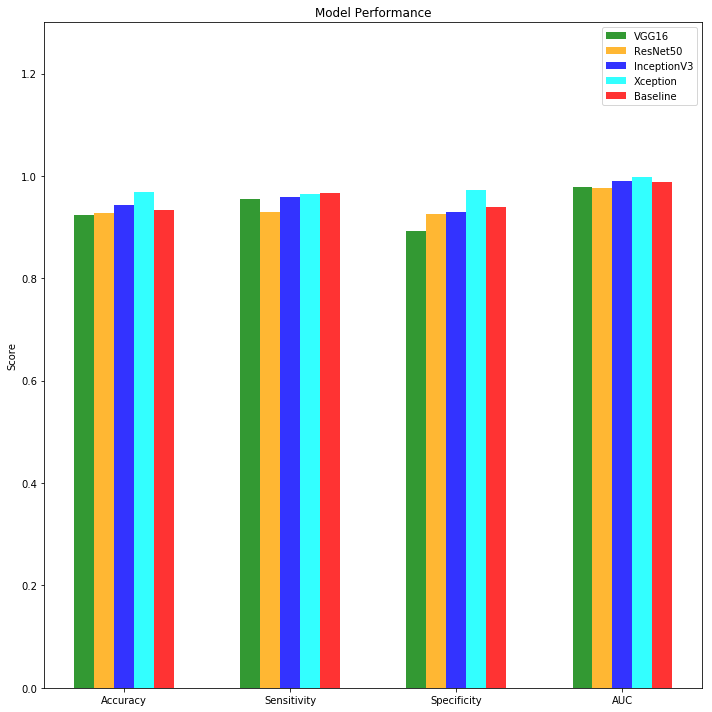

In [39]:
opacity = 0.8
error_config = {'ecolor': '0.3'}
n_groups = 4
nModels = len(modelPred.keys()) + 1

fig, ax = plt.subplots(figsize=(10, 10))
index = np.arange(n_groups)
bar_width = 0.12
colors = ['green', 'orange', 'blue', 'cyan']
for i, (vgg_i, c) in enumerate(zip(modelPred.keys(), colors)):
    
    xpos = index - nModels*bar_width/2 + (i+1)*bar_width
    rectsi = ax.bar(xpos, 
                    metricsDF.loc[vgg_i], bar_width,
                    alpha=opacity, color=c,
                    label=vgg_i)

xpos = index - nModels*bar_width/2 + (i+2)*bar_width
rects2 = ax.bar(xpos, reportedMetrics, bar_width,
                alpha=opacity, color='r', 
                label='Baseline')

#ax.set_xlabel('Group')
ax.set_ylabel('Score')
ax.set_title('Model Performance')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Accuracy', 'Sensitivity', 'Specificity', 'AUC'))
ax.set_ylim([0.0, 1.3])
ax.legend()

fig.tight_layout()
plt.show()
    